In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
dfMa = pd.read_json(r'./Ma.json')
dfOa = pd.read_json(r'./Oa.json')

dfWordList = pd.concat([dfOa, dfMa], ignore_index=True)
dfWordList

,0
0,aahed
1,aalii
2,aargh
3,aarti
4,abaca
...,...
12942,judge
12943,rower
12944,artsy
12945,rural


In [5]:
dfWordList['letter1'] = dfWordList.apply(lambda row: row[0][0], axis=1)
dfWordList['letter2'] = dfWordList.apply(lambda row: row[0][1], axis=1)
dfWordList['letter3'] = dfWordList.apply(lambda row: row[0][2], axis=1)
dfWordList['letter4'] = dfWordList.apply(lambda row: row[0][3], axis=1)
dfWordList['letter5'] = dfWordList.apply(lambda row: row[0][4], axis=1)
dfWordList

,0,letter1,letter2,letter3,letter4,letter5
0,aahed,a,a,h,e,d
1,aalii,a,a,l,i,i
2,aargh,a,a,r,g,h
3,aarti,a,a,r,t,i
4,abaca,a,b,a,c,a
...,...,...,...,...,...,...
2304,judge,j,u,d,g,e
2305,rower,r,o,w,e,r
2306,artsy,a,r,t,s,y
2307,rural,r,u,r,a,l


In [6]:
dfWordList['letter1'].describe()

count     12947
unique       26
top           s
freq       1560
Name: letter1, dtype: object

<AxesSubplot:>

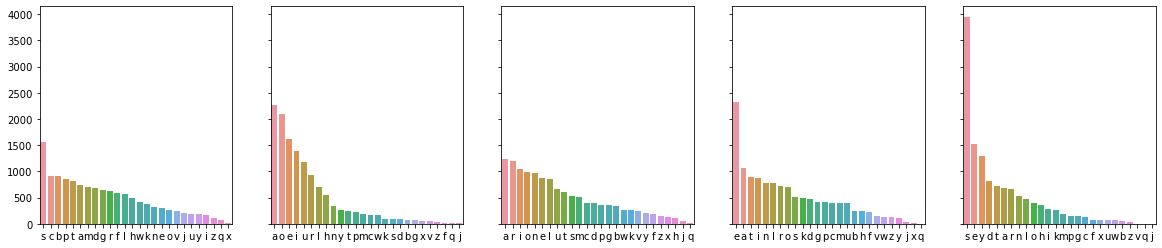

In [7]:
f, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
l1_counts = dfWordList['letter1'].value_counts()
l2_counts = dfWordList['letter2'].value_counts()
l3_counts = dfWordList['letter3'].value_counts()
l4_counts = dfWordList['letter4'].value_counts()
l5_counts = dfWordList['letter5'].value_counts()
sns.barplot(x=l1_counts.keys(), y=l1_counts.values, ax=axs[0])
sns.barplot(x=l2_counts.keys(), y=l2_counts.values, ax=axs[1])
sns.barplot(x=l3_counts.keys(), y=l3_counts.values, ax=axs[2])
sns.barplot(x=l4_counts.keys(), y=l4_counts.values, ax=axs[3])
sns.barplot(x=l5_counts.keys(), y=l5_counts.values, ax=axs[4])


In [29]:
def numRemainingWords(sWordList, pattern):
    return sWordList.str.match(pattern).sum()

def calcPatternProb(sWordList, pattern):
    return sWordList.str.match(pattern).sum() / sWordList.size

def calcPatternEntropy(sWordList, pattern): # assumes equal prob per word
    # return [np.log2(sWordList[i].nunique()) for i in range(2)].sum()
    return np.log2(sWordList.str.match(pattern).sum())

def EVofEntropy(word, sWordList):
    entropy = 0
    patterns = [f"(?!{word})", f"[{word[0]}](?!{word[1:]})"]

    for pattern in patterns:
        print(calcPatternProb(sWordList, pattern))
        print(calcPatternEntropy(sWordList, pattern))
        entropy += calcPatternProb(sWordList, pattern) * calcPatternEntropy(sWordList, pattern)

    return entropy

EVofEntropy("aahed", dfWordList[0])

# def calcEntropy(sWordList, guess):
#     guessPattern = [guess[0] + '....', '.' + guess[1], '..' + guess[2]]

# calcEntropy(numRemainingWords(dfWordList[0], "s...."))

# calcEntropy( pd.Series(["aa", "ab"]) )

# print(len(dfWordList))
# print(dfWordList[0][0])
# print(dfWordList[0].str.match(f"(?!{dfWordList[0][0]})").sum())

# prob all wrong * Entropy + prob 1 wrong * Entropy ...
# Pick word with least entropy

0.9999227620298139
13.660218788535618
0.05676990808681548
9.521600439723727


14.19970408276659

In [ ]:
# H = - sum_i( P(x) * log2( P(x) ) )

# l1_counts.values

# [x] [/] [o] [] []

- sum( l5_counts.values/l5_counts.values.sum() * np.log2(l5_counts.values / l5_counts.values.sum()) )

array([-0.52252556, -0.36269971, -0.33252642, -0.25251949, -0.23307502,
       -0.22305008, -0.22174472, -0.18873525, -0.17494861, -0.15165227,
       -0.14571983, -0.11961792, -0.1122468 , -0.0864881 , -0.07335419,
       -0.07179776, -0.06544365, -0.04625224, -0.0407178 , -0.03929977,
       -0.03786677, -0.03544323, -0.021405  , -0.00360248, -0.00360248,
       -0.00279803])

In [ ]:
np.log2(l1_counts.values / l1_counts.values.sum())

array([-3.05299991, -3.81484017, -3.83378174, -3.91717883, -3.98967397,
       -4.13676827, -4.22361868, -4.24881924, -4.34518066, -4.36570947,
       -4.44358437, -4.49291208, -4.72959289, -4.97733564, -5.10958344,
       -5.31603432, -5.41715624, -5.62690722, -5.74146699, -6.00211874,
       -6.0980878 , -6.16048434, -6.29400801, -6.94608471, -7.374928  ,
       -9.66033022])

In [31]:
def generate_combinations():
    combinations = []
    for g in range(6):  # 0 to 5 green letters
        for y in range(6 - g):  # Remaining could be yellow
            n = 5 - g - y  # The rest will be gray
            combinations.append((g, y, n))
    return combinations

def matches_combination(word, guess, combination):
    g, y, n = combination
    green_count, yellow_count = 0, 0

    # Count green letters
    for i in range(5):
        if word[i] == guess[i]:
            green_count += 1

    # Count yellow letters
    for i in range(5):
        if word[i] in guess and word[i] != guess[i]:
            yellow_count += 1

    return green_count == g and yellow_count == y

# Example Usage
word_list = ["apple", "table", "chair", "grape", "flame", "talbxs"]  # Your actual word list will be larger
guess = "table"
combination = (2, 2, 1)

matching_words = [word for word in word_list if matches_combination(word, guess, combination)]
print(matching_words)


['talbxs']


In [39]:
def generate_explicit_combinations():
    statuses = 'GYN'
    return [''.join(p) for p in itertools.product(statuses, repeat=5)]

def matches_explicit_combination(word, guess, combination):
    for i in range(5):
        if combination[i] == 'G' and word[i] != guess[i]:
            return False
        elif combination[i] == 'Y' and (word[i] == guess[i] or word[i] not in guess):
            return False
        elif combination[i] == 'N' and word[i] in guess:
            return False
    return True

# Example Usage
word_list = ["apple", "table", "chair", "grape", "flame", "table"]
guess = "table"
combination = 'GGGGY'

matching_words = [word for word in word_list if matches_explicit_combination(word, guess, combination)]
print(matching_words)


[]


In [40]:
import itertools
from collections import Counter

def generate_explicit_combinations():
    statuses = 'GYN'
    return [''.join(p) for p in itertools.product(statuses, repeat=5)]

def matches_explicit_combination(word, guess, combination):
    green_match = [i for i in range(5) if word[i] == guess[i] and combination[i] == 'G']
    if len(green_match) != combination.count('G'):
        return False

    # Remove green matches to consider yellows
    remaining_word_chars = [word[i] for i in range(5) if i not in green_match]
    remaining_guess_chars = [guess[i] for i in range(5) if i not in green_match]

    word_tally = Counter(remaining_word_chars)
    guess_tally = Counter(remaining_guess_chars)

    yellows = sum([min(word_tally[c], guess_tally[c]) for c in set(remaining_guess_chars)])
    if yellows != combination.count('Y'):
        return False

    return True

# Example Usage
word_list = ["apple", "table", "chair", "grape", "flame", "tablb"]
guess = "table"
combination = 'GGGGY'

matching_words = [word for word in word_list if matches_explicit_combination(word, guess, combination)]
print(matching_words)


['table']
